# Athena
## Factor Analysis

In [ ]:
import pandas as pd
import numpy as np
!pip install factor-analyzer
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 971.5 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42623 sha256=e5badb19baf10558d48d5cd9f3ee682f3e62b6b480ae558b7bfb7b0468440c69
  Stored in directory: /root/.cache/pip/wheels/fa/f7/53/a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor-analyzer


In [ ]:
# Step 0: Read the data
Athena = pd.read_csv("Athena_survey_data.csv")
Athena

,gender,state,age,income,imp.challenge,imp.unlocks,imp.customize,imp.difficulty,imp.characters,imp.storyline,...,freq.customize,freq.test.world,gg.game.presented,gg.maxprice,rank.WarriorGuild,rank.SeraphGuardians,rank.Evercrest,rank.DevilsGate,rank.Marksman,rank.QuestoftheTitan
0,male,IN,19,20000,4,7,5,7,5,3,...,3,1,Warrior Guild,42.0,2,3,6,4,1,5
1,male,OR,29,80000,5,7,1,4,2,4,...,1,3,Warrior Guild,59.0,3,1,6,4,2,5
2,male,MN,52,91000,4,3,3,4,5,7,...,2,3,Seraph Guardians,74.0,4,1,3,5,6,2
3,female,FL,20,24000,7,3,3,6,5,4,...,2,3,Warrior Guild,38.0,3,1,4,2,5,6
4,female,NM,33,64000,7,6,1,7,1,2,...,1,3,Evercrest,42.0,3,2,5,4,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,male,MA,28,54000,5,3,1,5,3,3,...,2,5,Evercrest,44.0,1,2,5,3,4,6
2174,male,NY,42,118000,3,7,3,3,6,3,...,1,1,Evercrest,75.0,6,1,3,5,4,2
2175,female,MO,52,97000,6,5,1,5,3,2,...,2,3,Evercrest,63.0,4,2,6,3,1,5
2176,nonbinary,TX,22,33000,2,4,4,1,2,1,...,2,2,Seraph Guardians,28.0,2,4,6,1,3,5


In [ ]:
# Step 1: Evaluate the data
# Bartlett's Test of Sphericity (we want p < 0.05 to go ahead)
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(Athena.iloc[:, 4:44])
print(f"Bartlett's Test of Sphericity p-value: {p_value}")

# KMO-test (we want overall MSA > 0.6 to go ahead)
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(Athena.iloc[:, 4:44])
print(f"KMO-test overall MSA: {kmo_model}")

Bartlett's Test of Sphericity p-value: 0.0
KMO-test overall MSA: 0.8903064302758804


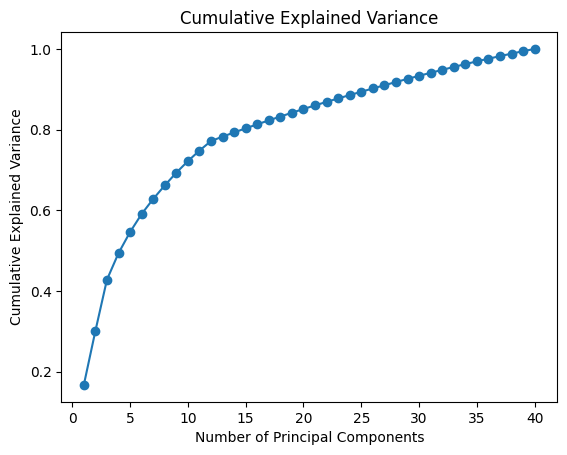

array([6.6930014 , 5.35042033, 5.08654204, 2.63196852, 2.09323499,
       1.79060433, 1.49185008, 1.34244474, 1.26272407, 1.14607329,
       1.04575203, 0.9461203 , 0.43730903, 0.41672851, 0.40923929,
       0.39558531, 0.39151915, 0.37984153, 0.37767606, 0.37204413,
       0.35662305, 0.3502892 , 0.33996429, 0.33292758, 0.32947343,
       0.32751998, 0.32053907, 0.31765556, 0.31178708, 0.30282288,
       0.29923353, 0.29216912, 0.28939193, 0.28204642, 0.2716738 ,
       0.26252222, 0.25701791, 0.24804166, 0.24196581, 0.22403024])

In [ ]:
# Step 2: Determine the number of factors
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the features (important for PCA)
scaler = StandardScaler()
Athena_scaled = scaler.fit_transform(Athena.iloc[:, 4:44])

# Create and fit the PCA model
pca = PCA()
pca.fit(Athena_scaled)

# Get the explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratios.cumsum()

# Plot the explained variance ratios, want the factors to explain
# very roughly 70% or more of the variance
plt.plot(range(1, len(explained_variance_ratios) + 1), \
         cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

pca.explained_variance_ # eigenvalues; want values > 1

In [ ]:
# Step 3: Extract the factor solution (with varimax rotation)
from factor_analyzer import Rotator
from sklearn.decomposition import FactorAnalysis

rotator = Rotator()

np.random.seed(16)

fa = FactorAnalysis(n_components=12, random_state=16)
fa.fit(Athena_scaled)
rotated_loading = rotator.fit_transform(fa.components_.T)

print("Rotated Factor Loadings:")
pd.DataFrame(rotated_loading, columns=['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5', 'Factor 6', 'Factor 7', 'Factor 8', 'Factor 9', 'Factor 10', 'Factor 11', 'Factor 12'], index=Athena.columns[4:44])

Rotated Factor Loadings:


,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6,Factor 7,Factor 8,Factor 9,Factor 10,Factor 11,Factor 12
imp.challenge,0.143816,0.008952,0.053686,-0.149213,-0.420911,0.000846,0.091751,0.014452,-0.030988,0.025064,-0.002354,0.679193
imp.unlocks,-0.068910,-0.764332,0.084968,-0.136280,0.101168,0.160684,0.002972,0.222675,-0.009822,0.033819,-0.157788,-0.013059
imp.customize,0.114154,-0.014437,-0.097693,-0.098733,-0.003214,-0.008667,-0.214069,-0.044422,0.759758,0.071640,0.050348,-0.032333
imp.difficulty,0.138380,-0.004721,0.080651,-0.135369,-0.417979,0.014744,0.083549,0.013979,-0.030859,0.005647,0.007368,0.682346
imp.characters,0.075025,0.073405,-0.780092,0.043413,0.023205,-0.029800,-0.303420,-0.003845,0.099189,0.061951,-0.043880,-0.034357
imp.storyline,0.087869,0.079337,-0.761640,0.054549,0.001086,-0.050521,-0.320624,-0.010682,0.128718,0.045098,-0.072333,-0.044597
imp.mastery,0.167855,0.031853,0.037539,-0.114395,-0.670395,-0.018931,0.034033,-0.016707,-0.007315,-0.002142,-0.011700,0.418998
imp.backstory,0.078450,0.066796,-0.786289,0.042575,0.029008,-0.008776,-0.304671,-0.010332,0.116628,0.023916,-0.060967,-0.043595
imp.dominate,0.061733,0.126961,0.050028,0.042890,0.026835,-0.145814,0.022253,-0.183522,0.046160,0.088230,0.705112,0.036140
imp.completion,-0.070238,-0.800301,0.051916,-0.121228,0.105101,0.139243,0.024760,0.192694,0.003411,0.038560,-0.147805,0.001409


In [ ]:
# Step 4: Create and name the factor scores
factor_scores = fa.transform(Athena_scaled)
Athena['Offbeat Explorers'] = factor_scores[:, 0]
Athena['Experience-First Gamers'] = factor_scores[:, 1]
Athena['Story-Indifferent Gamers'] = factor_scores[:, 2]
Athena['Chaotic Thrill-Seekers'] = factor_scores[:, 3]
Athena['Low-effort-game lover'] = factor_scores[:, 4]
Athena['Slow-Paced Players'] = factor_scores[:, 5]
Athena['Down-to-Earth Gamers'] = factor_scores[:, 6]
Athena['Lone Wolf Players'] = factor_scores[:, 7]
Athena['Customization Enthusiasts'] = factor_scores[:, 8]
Athena['Power-Levelers'] = factor_scores[:, 9]
Athena['Competitive Duelists'] = factor_scores[:, 10]
Athena['Hardcore Challenge Seekers'] = factor_scores[:, 11]
Athena

,gender,state,age,income,imp.challenge,imp.unlocks,imp.customize,imp.difficulty,imp.characters,imp.storyline,...,Story-Indifferent Gamers,Chaotic Thrill-Seekers,Low-effort-game lover,Slow-Paced Players,Down-to-Earth Gamers,Lone Wolf Players,Customization Enthusiasts,Power-Levelers,Competitive Duelists,Hardcore Challenge Seekers
0,male,IN,19,20000,4,7,5,7,5,3,...,0.368100,-1.706781,0.201879,-1.015966,0.910896,-0.959963,-0.859362,0.226233,-1.274666,1.013598
1,male,OR,29,80000,5,7,1,4,2,4,...,0.417544,0.397648,1.818896,0.233650,-1.469682,-0.043485,-1.476046,-0.045054,0.640754,0.233645
2,male,MN,52,91000,4,3,3,4,5,7,...,-1.264157,0.162059,-1.115223,1.265094,-1.118340,0.268665,0.169049,0.457924,-0.701992,0.232708
3,female,FL,20,24000,7,3,3,6,5,4,...,1.711405,-0.706245,-1.497132,-0.078067,-1.414715,-0.566835,-0.671345,-0.033343,1.450238,0.316516
4,female,NM,33,64000,7,6,1,7,1,2,...,2.052405,0.814327,0.047041,-0.470370,-1.205087,-0.011018,0.043823,-0.133808,-0.886460,0.338741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,male,MA,28,54000,5,3,1,5,3,3,...,1.401212,-0.769327,-0.124914,1.622698,1.180848,0.538092,-1.068747,0.372355,-0.755297,-0.198384
2174,male,NY,42,118000,3,7,3,3,6,3,...,0.009878,-0.670633,-1.246393,0.410185,0.082624,-0.003092,-0.772286,-0.034688,0.136124,-0.904486
2175,female,MO,52,97000,6,5,1,5,3,2,...,1.891246,0.874583,0.174934,1.037250,0.543370,1.024988,0.364710,0.053535,0.297610,0.201477
2176,nonbinary,TX,22,33000,2,4,4,1,2,1,...,0.511535,-0.523989,0.923325,-0.883678,-0.613559,0.817830,1.101386,0.997756,0.535952,-1.538442


## Cluster Analysis

<ipython-input-8-d53b038994a1>:8: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  hc = linkage(dissimilarity_matrix, method="ward")


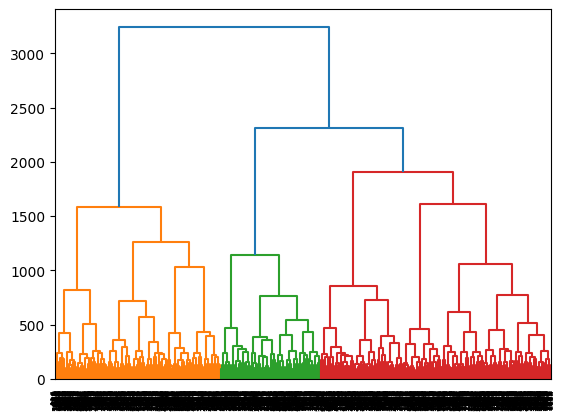

In [ ]:
# Step 1: determine the number of clusters
# Option A: dendogram
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
dissimilarity_matrix = squareform(pdist(Athena.iloc[:, 4:44], metric='euclidean'))

# perform hierarchical clustering using Ward's method on this matrix
hc = linkage(dissimilarity_matrix, method="ward")

# plot the resulting dendrogram
dendrogram(hc, leaf_font_size=6)
plt.show()

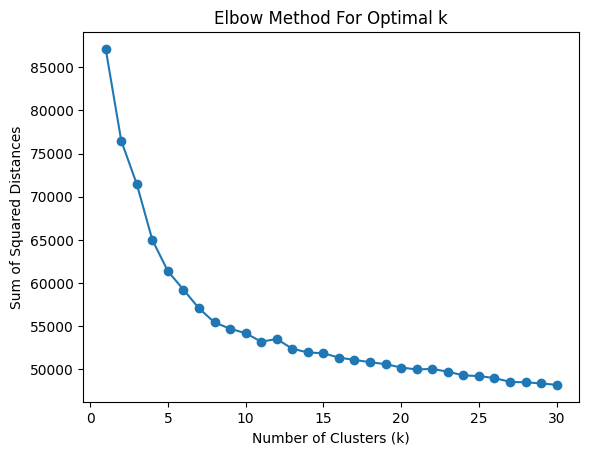

In [ ]:
#Adding these 2 lines above professors code cause I kept getting a bunch of warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

# Option B: The Elbow
from sklearn.cluster import KMeans

# Calculate the sum of squared distances for different values of k
sum_of_squared_distances = []
K_range = range(1, 31)  # You can adjust this range based on your problem
for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(Athena_scaled)
    sum_of_squared_distances.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(K_range, sum_of_squared_distances, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.show()

Modifying K-Means to use Factor Scores instead of raw survey data as per assingment instructions

In [ ]:
# Step 2: Calculate the final cluster solution using Factor Scores
kmeans_fa = KMeans(n_clusters=7, random_state=11, n_init='auto')

# Use only the factor scores for clustering
Athena['Factor_Cluster'] = kmeans_fa.fit_predict(Athena[['Offbeat Explorers', 'Experience-First Gamers', 'Story-Indifferent Gamers', 'Chaotic Thrill-Seekers', 'Low-effort-game lover', 'Slow-Paced Players', 'Down-to-Earth Gamers', 'Lone Wolf Players', 'Customization Enthusiasts', 'Power-Levelers', 'Competitive Duelists', 'Hardcore Challenge Seekers']])

# Print cluster centers
print("Cluster Centers (Factor-Based Clustering):")
pd.DataFrame(kmeans_fa.cluster_centers_, columns=['Offbeat Explorers', 'Experience-First Gamers', 'Story-Indifferent Gamers', 'Chaotic Thrill-Seekers', 'Low-effort-game lover', 'Slow-Paced Players', 'Down-to-Earth Gamers', 'Lone Wolf Players', 'Customization Enthusiasts', 'Power-Levelers', 'Competitive Duelists', 'Hardcore Challenge Seekers'])


Cluster Centers (Factor-Based Clustering):


,Offbeat Explorers,Experience-First Gamers,Story-Indifferent Gamers,Chaotic Thrill-Seekers,Low-effort-game lover,Slow-Paced Players,Down-to-Earth Gamers,Lone Wolf Players,Customization Enthusiasts,Power-Levelers,Competitive Duelists,Hardcore Challenge Seekers
0,-0.590358,1.143583,-0.227830,-0.484774,1.042038,-0.165857,-0.139600,0.252122,-0.121769,0.047935,0.095370,-0.007433
1,0.768305,-0.984278,-0.780282,0.394323,0.367360,-0.219869,0.150641,0.361680,0.054537,0.158050,-0.051736,-0.130225
2,-1.059759,-0.885927,-0.146238,-0.777571,0.003919,-0.160742,-0.004006,-0.239973,0.154995,-0.084239,0.028457,0.020055
3,-0.781487,0.561493,-0.546581,1.230024,-0.465642,-0.021969,0.098428,-0.107271,-0.102849,-0.097539,0.031374,0.019062
4,0.933167,0.460856,0.660249,-0.106241,-0.167855,-0.555300,0.071419,-0.356938,-0.088484,-0.038772,-0.033543,0.037644
5,-0.152083,-0.403715,1.432903,0.282908,0.125263,0.588971,-0.183710,0.273761,0.061964,0.028429,-0.017249,0.073394
6,0.617784,0.529225,-0.728825,-0.806713,-0.951038,0.932647,-0.076848,-0.091418,0.033316,-0.013264,-0.025364,-0.013419


In [ ]:
print(Athena.columns[52:64])

Index(['Offbeat Explorers', 'Experience-First Gamers',
       'Story-Indifferent Gamers', 'Chaotic Thrill-Seekers',
       'Low-effort-game lover', 'Slow-Paced Players', 'Down-to-Earth Gamers',
       'Lone Wolf Players', 'Customization Enthusiasts', 'Power-Levelers',
       'Competitive Duelists', 'Hardcore Challenge Seekers'],
      dtype='object')


In [ ]:
# Step 3: Interpret the K-means output
print("Cluster Centers:")
pd.DataFrame(kmeans_fa.cluster_centers_, columns=Athena.columns[52:64], \
             index=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6'])

Cluster Centers:


,Offbeat Explorers,Experience-First Gamers,Story-Indifferent Gamers,Chaotic Thrill-Seekers,Low-effort-game lover,Slow-Paced Players,Down-to-Earth Gamers,Lone Wolf Players,Customization Enthusiasts,Power-Levelers,Competitive Duelists,Hardcore Challenge Seekers
Cluster 0,-0.590358,1.143583,-0.227830,-0.484774,1.042038,-0.165857,-0.139600,0.252122,-0.121769,0.047935,0.095370,-0.007433
Cluster 1,0.768305,-0.984278,-0.780282,0.394323,0.367360,-0.219869,0.150641,0.361680,0.054537,0.158050,-0.051736,-0.130225
Cluster 2,-1.059759,-0.885927,-0.146238,-0.777571,0.003919,-0.160742,-0.004006,-0.239973,0.154995,-0.084239,0.028457,0.020055
Cluster 3,-0.781487,0.561493,-0.546581,1.230024,-0.465642,-0.021969,0.098428,-0.107271,-0.102849,-0.097539,0.031374,0.019062
Cluster 4,0.933167,0.460856,0.660249,-0.106241,-0.167855,-0.555300,0.071419,-0.356938,-0.088484,-0.038772,-0.033543,0.037644
Cluster 5,-0.152083,-0.403715,1.432903,0.282908,0.125263,0.588971,-0.183710,0.273761,0.061964,0.028429,-0.017249,0.073394
Cluster 6,0.617784,0.529225,-0.728825,-0.806713,-0.951038,0.932647,-0.076848,-0.091418,0.033316,-0.013264,-0.025364,-0.013419


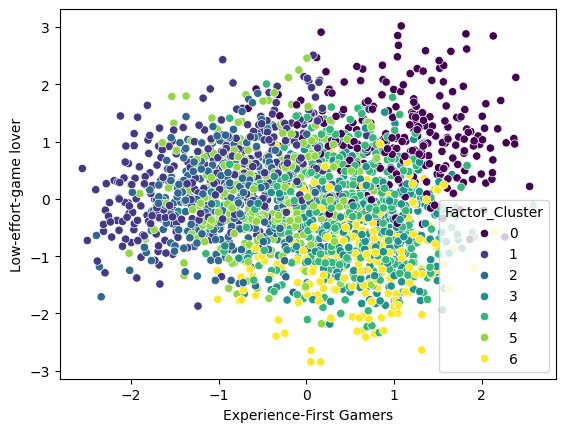

In [ ]:
# Visualize K-means clusters
import seaborn as sns

sns.scatterplot(data=Athena, x='Experience-First Gamers', y='Low-effort-game lover', hue='Factor_Cluster', palette='viridis')
plt.show()

In [ ]:
# Step 5: Add labels to the clusters
Athena['Segment_Label'] = Athena['Factor_Cluster'].replace({0: 'Casual Comfort Gamers', 1: 'Curious Adventurers', 2: 'Structured Traditionalists', 3: 'Thrill-Seeking Traditionalists', 4: 'Curious Free-Spirits', 5: 'Laid-Back Story-skipper', 6: 'Thoughtful Explorers'})
Athena

,gender,state,age,income,imp.challenge,imp.unlocks,imp.customize,imp.difficulty,imp.characters,imp.storyline,...,Low-effort-game lover,Slow-Paced Players,Down-to-Earth Gamers,Lone Wolf Players,Customization Enthusiasts,Power-Levelers,Competitive Duelists,Hardcore Challenge Seekers,Factor_Cluster,Segment_Label
0,male,IN,19,20000,4,7,5,7,5,3,...,0.201879,-1.015966,0.910896,-0.959963,-0.859362,0.226233,-1.274666,1.013598,2,Structured Traditionalists
1,male,OR,29,80000,5,7,1,4,2,4,...,1.818896,0.233650,-1.469682,-0.043485,-1.476046,-0.045054,0.640754,0.233645,0,Casual Comfort Gamers
2,male,MN,52,91000,4,3,3,4,5,7,...,-1.115223,1.265094,-1.118340,0.268665,0.169049,0.457924,-0.701992,0.232708,6,Thoughtful Explorers
3,female,FL,20,24000,7,3,3,6,5,4,...,-1.497132,-0.078067,-1.414715,-0.566835,-0.671345,-0.033343,1.450238,0.316516,4,Curious Free-Spirits
4,female,NM,33,64000,7,6,1,7,1,2,...,0.047041,-0.470370,-1.205087,-0.011018,0.043823,-0.133808,-0.886460,0.338741,5,Laid-Back Story-skipper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,male,MA,28,54000,5,3,1,5,3,3,...,-0.124914,1.622698,1.180848,0.538092,-1.068747,0.372355,-0.755297,-0.198384,5,Laid-Back Story-skipper
2174,male,NY,42,118000,3,7,3,3,6,3,...,-1.246393,0.410185,0.082624,-0.003092,-0.772286,-0.034688,0.136124,-0.904486,2,Structured Traditionalists
2175,female,MO,52,97000,6,5,1,5,3,2,...,0.174934,1.037250,0.543370,1.024988,0.364710,0.053535,0.297610,0.201477,5,Laid-Back Story-skipper
2176,nonbinary,TX,22,33000,2,4,4,1,2,1,...,0.923325,-0.883678,-0.613559,0.817830,1.101386,0.997756,0.535952,-1.538442,0,Casual Comfort Gamers


In [ ]:
# Function to assign age groups
def assign_age_group(age):
    if 18 <= age <= 29:
        return 'Young Adults'
    elif 30 <= age <= 41:
        return 'Early Middle Age'
    elif 42 <= age <= 53:
        return 'Late Middle Age'
    elif 54 <= age <= 65:
        return 'Older Adults'
    else:
        return 'Unknown'  # Handle cases outside the defined ranges

# Apply the function to create the 'AgeGroup' column
Athena['AgeGroup'] = Athena['age'].apply(assign_age_group)


# Function to assign income groups
def assign_income_group(income):
    if 2000 <= income <= 60000:
        return 'Low'
    elif 60001 <= income <= 120000:
        return 'Lower-Mid'
    elif 120001 <= income <= 180000:
        return 'Upper-Mid'
    elif 180001 <= income <= 239000:
        return 'High'
    else:
        return 'Unknown'  # Handle cases outside the defined ranges

# Apply the function to create the 'IncomeGroup' column
Athena['IncomeGroup'] = Athena['income'].apply(assign_income_group)

print(Athena[['age', 'AgeGroup', 'income', 'IncomeGroup']].head())



   age          AgeGroup  income IncomeGroup
0   19      Young Adults   20000         Low
1   29      Young Adults   80000   Lower-Mid
2   52   Late Middle Age   91000   Lower-Mid
3   20      Young Adults   24000         Low
4   33  Early Middle Age   64000   Lower-Mid


In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
def xtab(d1, d2):
    crosstab = pd.crosstab(index=d1, columns=d2)
    chi2, p, _, expected = chi2_contingency(crosstab)
    contributions = (crosstab - expected) ** 2 / expected

    # Create a multi-index DataFrame
    index = pd.MultiIndex.from_product([crosstab.index, ['Observed', 'Expected', 'Chi squared']])
    columns = pd.MultiIndex.from_product([crosstab.columns])

    df = pd.DataFrame(index=index, columns=columns)

    # Fill in the DataFrame
    df.loc[crosstab.index, 'Observed', :] = crosstab.values
    df.loc[crosstab.index, 'Expected', :] = expected.round(2)
    df.loc[crosstab.index, 'Chi squared', :] = contributions.values.round(2)

    print(f"Chi-squared value: {chi2}")
    print(f"P-value: {p}")
    return(df)

In [ ]:
xtab(Athena['Segment_Label'], Athena['AgeGroup'])

Chi-squared value: 504.9942519490984
P-value: 9.29710063324089e-96


AgeGroup                                   Early Middle Age Late Middle Age  \
Segment_Label                                                                 
Casual Comfort Gamers          Observed                   3               0   
                               Expected               49.27            12.8   
                               Chi squared            43.46            12.8   
Curious Adventurers            Observed                  95              38   
                               Expected               69.26            18.0   
                               Chi squared             9.57           22.23   
Curious Free-Spirits           Observed                  34               2   
                               Expected               78.96           20.52   
                               Chi squared             25.6           16.71   
Laid-Back Story-skipper        Observed                 115              28   
                               Expected               62.14           16.15   
                               Chi squared            44.97             8.7   
Structured Traditionalists     Observed                  78              24   
                               Expected               65.11           16.92   
                               Chi squared             2.55            2.96   
Thoughtful Explorers           Observed                  31               4   
                               Expected               45.51           11.83   
                               Chi squared             4.63            5.18   
Thrill-Seeking Traditionalists Observed                  75              16   
                               Expected               60.75           15.79   
                               Chi squared             3.34             0.0   

AgeGroup                                   Older Adults Young Adults  
Segment_Label                                                         
Casual Comfort Gamers          Observed               0          246  
                               Expected           11.43       175.49  
                               Chi squared        11.43        28.33  
Curious Adventurers            Observed              64          153  
                               Expected           16.07       246.67  
                               Chi squared       142.96        35.57  
Curious Free-Spirits           Observed               1          362  
                               Expected           18.32       281.21  
                               Chi squared        16.37        23.21  
Laid-Back Story-skipper        Observed              17          154  
                               Expected           14.42        221.3  
                               Chi squared         0.46        20.47  
Structured Traditionalists     Observed               7          220  
                               Expected           15.11       231.87  
                               Chi squared         4.35         0.61  
Thoughtful Explorers           Observed               0          195  
                               Expected           10.56        162.1  
                               Chi squared        10.56         6.68  
Thrill-Seeking Traditionalists Observed              11          205  
                               Expected            14.1       216.37  
                               Chi squared         0.68          0.6

In [ ]:
xtab(Athena['Segment_Label'], Athena['IncomeGroup'])

Chi-squared value: 293.3686152321015
P-value: 1.1105593108519311e-51


IncomeGroup                                 High     Low Lower-Mid Upper-Mid
Segment_Label                                                               
Casual Comfort Gamers          Observed        0     235        14         0
                               Expected     0.69  167.26     73.28      7.77
                               Chi squared  0.69   27.44     47.96      7.77
Curious Adventurers            Observed        3     169       155        23
                               Expected     0.96   235.1    103.01     10.93
                               Chi squared   4.3   18.58     26.24     13.34
Curious Free-Spirits           Observed        0     331        67         1
                               Expected      1.1  268.02    117.43     12.46
                               Chi squared   1.1    14.8     21.66     10.54
Laid-Back Story-skipper        Observed        2     145       146        21
                               Expected     0.87  210.92     92.41       9.8
                               Chi squared  1.49    20.6     31.07     12.79
Structured Traditionalists     Observed        0     215       106         8
                               Expected     0.91  220.99     96.83     10.27
                               Chi squared  0.91    0.16      0.87       0.5
Thoughtful Explorers           Observed        0     186        43         1
                               Expected     0.63  154.49     67.69      7.18
                               Chi squared  0.63    6.42      9.01      5.32
Thrill-Seeking Traditionalists Observed        1     182       110        14
                               Expected     0.85  206.22     90.35      9.58
                               Chi squared  0.03    2.84      4.27      2.03

In [ ]:
xtab(Athena['Segment_Label'], Athena['gender'])

Chi-squared value: 46.06622483736384
P-value: 6.758408264163226e-06


gender                                      female    male nonbinary
Segment_Label                                                       
Casual Comfort Gamers          Observed         88     160         1
                               Expected     114.44  132.85      1.71
                               Chi squared    6.11    5.55       0.3
Curious Adventurers            Observed        176     171         3
                               Expected     160.86  186.73      2.41
                               Chi squared    1.43    1.33      0.14
Curious Free-Spirits           Observed        178     217         4
                               Expected     183.38  212.87      2.75
                               Chi squared    0.16    0.08      0.57
Laid-Back Story-skipper        Observed        134     180         0
                               Expected     144.31  167.52      2.16
                               Chi squared    0.74    0.93      2.16
Structured Traditionalists     Observed        184     141         4
                               Expected     151.21  175.53      2.27
                               Chi squared    7.11    6.79      1.33
Thoughtful Explorers           Observed        121     109         0
                               Expected     105.71  122.71      1.58
                               Chi squared    2.21    1.53      1.58
Thrill-Seeking Traditionalists Observed        120     184         3
                               Expected      141.1  163.79      2.11
                               Chi squared    3.15    2.49      0.37

In [ ]:
xtab(Athena['Segment_Label'], Athena['state'])

Chi-squared value: 292.2080788742178
P-value: 0.5185588437200972


state                                         AK    AL    AR    AZ     CA  \
Segment_Label                                                               
Casual Comfort Gamers          Observed        1     3     1     4     28   
                               Expected     0.91  3.32  2.74   4.8  28.81   
                               Chi squared  0.01  0.03  1.11  0.13   0.02   
Curious Adventurers            Observed        2     5     5     8     35   
                               Expected     1.29  4.66  3.86  6.75   40.5   
                               Chi squared   0.4  0.02  0.34  0.23   0.75   
Curious Free-Spirits           Observed        3     3     1     8     42   
                               Expected     1.47  5.31   4.4  7.69  46.17   
                               Chi squared  1.61  1.01  2.62  0.01   0.38   
Laid-Back Story-skipper        Observed        0     2     4     3     40   
                               Expected     1.15  4.18  3.46  6.06  36.33   
                               Chi squared  1.15  1.14  0.08  1.54   0.37   
Structured Traditionalists     Observed        1     4     3     8     43   
                               Expected     1.21  4.38  3.63  6.34  38.07   
                               Chi squared  0.04  0.03  0.11  0.43   0.64   
Thoughtful Explorers           Observed        1     6     4     5     25   
                               Expected     0.84  3.06  2.53  4.44  26.61   
                               Chi squared  0.03  2.82  0.85  0.07    0.1   
Thrill-Seeking Traditionalists Observed        0     6     6     6     39   
                               Expected     1.13  4.09  3.38  5.92  35.52   
                               Chi squared  1.13  0.89  2.02   0.0   0.34   

state                                         CO    CT    DE     FL     GA  \
Segment_Label                                                                
Casual Comfort Gamers          Observed        7     2     0     19      6   
                               Expected     4.12  3.43   0.8  15.66   7.32   
                               Chi squared  2.02   0.6   0.8   0.71   0.24   
Curious Adventurers            Observed        6     2     1     18     11   
                               Expected     5.79  4.82  1.12  22.02  10.28   
                               Chi squared  0.01  1.65  0.01   0.73   0.05   
Curious Free-Spirits           Observed       11     6     2     27     16   
                               Expected      6.6   5.5  1.28   25.1  11.72   
                               Chi squared  2.94  0.05   0.4   0.14   1.56   
Laid-Back Story-skipper        Observed        4     7     1     17      8   
                               Expected     5.19  4.33  1.01  19.75   9.23   
                               Chi squared  0.27  1.65   0.0   0.38   0.16   
Structured Traditionalists     Observed        2     6     2     23      6   
                               Expected     5.44  4.53  1.06  20.69   9.67   
                               Chi squared  2.17  0.48  0.84   0.26   1.39   
Thoughtful Explorers           Observed        2     2     0     15      7   
                               Expected      3.8  3.17  0.74  14.47   6.76   
                               Chi squared  0.85  0.43  0.74   0.02   0.01   
Thrill-Seeking Traditionalists Observed        4     5     1     18     10   
                               Expected     5.07  4.23  0.99  19.31   9.02   
                               Chi squared  0.23  0.14   0.0   0.09   0.11   

state                                       ...    SD    TN     TX    UT  \
Segment_Label                               ...                            
Casual Comfort Gamers          Observed     ...     0     3     19     3   
                               Expected     ...  1.03  4.92  22.98  2.06   
                               Chi squared  ...  1.03  0.75   0.69  0.43   
Curious Adventurers            Observed     ...     2

In [ ]:
# Calculate percentage female, average age, and average income per segment
segment_stats = Athena.groupby('Segment_Label').agg(
    Percentage_Female=('gender', lambda x: (x == 'female').sum() / len(x) * 100),
    Average_Age=('age', 'mean'),
    Average_Income=('income', 'mean')
)

segment_stats


,Percentage_Female,Average_Age,Average_Income
Segment_Label,,,
Casual Comfort Gamers,35.341365,20.763052,28064.257028
Curious Adventurers,50.285714,35.642857,67128.571429
Curious Free-Spirits,44.611529,22.914787,37676.691729
Laid-Back Story-skipper,42.675159,32.082803,68006.369427
Structured Traditionalists,55.927052,28.471125,52857.142857
Thoughtful Explorers,52.608696,24.013043,39373.913043
Thrill-Seeking Traditionalists,39.087948,28.723127,58182.410423


# Missing Data

In [ ]:
# Check for missing values in each column
missing_data = Athena.isnull().sum()

# Print the columns with missing values and their counts
print(missing_data[missing_data > 0])

gg.maxprice    138
dtype: int64


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
# Regression Imputation
Athena_filled = Athena.copy()
missing_rows = Athena_filled['gg.maxprice'].isnull()
X_train = Athena_filled.loc[~missing_rows, ['Offbeat Explorers', 'Experience-First Gamers', 'Story-Indifferent Gamers', 'Chaotic Thrill-Seekers', 'Low-effort-game lover', 'Slow-Paced Players', 'Down-to-Earth Gamers', 'Lone Wolf Players', 'Customization Enthusiasts', 'Power-Levelers', 'Competitive Duelists', 'Hardcore Challenge Seekers']].dropna()
y_train = Athena_filled.loc[X_train.index, 'gg.maxprice']
X_missing = Athena_filled.loc[missing_rows, ['Offbeat Explorers', 'Experience-First Gamers', 'Story-Indifferent Gamers', 'Chaotic Thrill-Seekers', 'Low-effort-game lover', 'Slow-Paced Players', 'Down-to-Earth Gamers', 'Lone Wolf Players', 'Customization Enthusiasts', 'Power-Levelers', 'Competitive Duelists', 'Hardcore Challenge Seekers']].dropna()

if not X_missing.empty:
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    Athena_filled.loc[X_missing.index, 'gg.maxprice'] = regressor.predict(X_missing)

Athena_filled

,gender,state,age,income,imp.challenge,imp.unlocks,imp.customize,imp.difficulty,imp.characters,imp.storyline,...,Down-to-Earth Gamers,Lone Wolf Players,Customization Enthusiasts,Power-Levelers,Competitive Duelists,Hardcore Challenge Seekers,Factor_Cluster,Segment_Label,AgeGroup,IncomeGroup
0,male,IN,19,20000,4,7,5,7,5,3,...,0.910896,-0.959963,-0.859362,0.226233,-1.274666,1.013598,2,Structured Traditionalists,Young Adults,Low
1,male,OR,29,80000,5,7,1,4,2,4,...,-1.469682,-0.043485,-1.476046,-0.045054,0.640754,0.233645,0,Casual Comfort Gamers,Young Adults,Lower-Mid
2,male,MN,52,91000,4,3,3,4,5,7,...,-1.118340,0.268665,0.169049,0.457924,-0.701992,0.232708,6,Thoughtful Explorers,Late Middle Age,Lower-Mid
3,female,FL,20,24000,7,3,3,6,5,4,...,-1.414715,-0.566835,-0.671345,-0.033343,1.450238,0.316516,4,Curious Free-Spirits,Young Adults,Low
4,female,NM,33,64000,7,6,1,7,1,2,...,-1.205087,-0.011018,0.043823,-0.133808,-0.886460,0.338741,5,Laid-Back Story-skipper,Early Middle Age,Lower-Mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,male,MA,28,54000,5,3,1,5,3,3,...,1.180848,0.538092,-1.068747,0.372355,-0.755297,-0.198384,5,Laid-Back Story-skipper,Young Adults,Low
2174,male,NY,42,118000,3,7,3,3,6,3,...,0.082624,-0.003092,-0.772286,-0.034688,0.136124,-0.904486,2,Structured Traditionalists,Late Middle Age,Lower-Mid
2175,female,MO,52,97000,6,5,1,5,3,2,...,0.543370,1.024988,0.364710,0.053535,0.297610,0.201477,5,Laid-Back Story-skipper,Late Middle Age,Lower-Mid
2176,nonbinary,TX,22,33000,2,4,4,1,2,1,...,-0.613559,0.817830,1.101386,0.997756,0.535952,-1.538442,0,Casual Comfort Gamers,Young Adults,Low


In [ ]:
# prompt: check if there is any missing value in Athena_filled.columns[45]

print(Athena_filled.columns[45])
print(Athena_filled[Athena_filled.columns[45]].isnull().values.any())


gg.maxprice
False


# WTP

WTP Analysis for Warrior Guild:


<ipython-input-53-cb91a14f4b95>:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cumulative_wtp = pd.concat([cumulative_wtp, pd.DataFrame({


,price,per_customers_wtp,pred_revenue
0,11.0,1.000000,8184.0
1,16.0,0.997312,11872.0
2,21.0,0.982527,15351.0
3,26.0,0.935484,18096.0
4,31.0,0.853495,19685.0
5,36.0,0.747312,20016.0
6,41.0,0.595430,18163.0
7,46.0,0.465054,15916.0
8,51.0,0.331989,12597.0
9,56.0,0.233871,9744.0


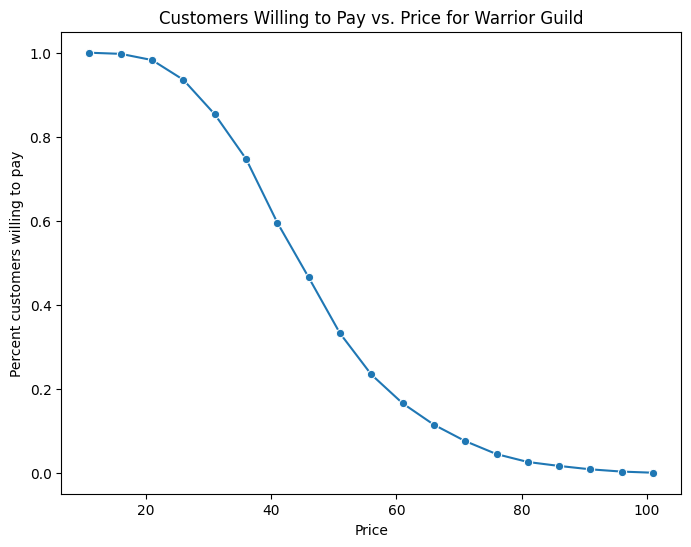

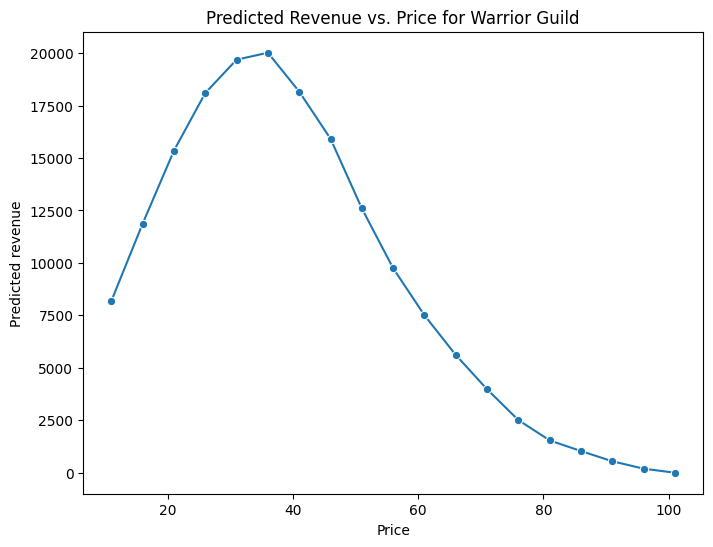

WTP Analysis for Seraph Guardians:


<ipython-input-53-cb91a14f4b95>:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cumulative_wtp = pd.concat([cumulative_wtp, pd.DataFrame({


,price,per_customers_wtp,pred_revenue
0,12.0,1.000000,9072.0
1,17.0,0.993386,12767.0
2,22.0,0.970899,16148.0
3,27.0,0.914021,18657.0
4,32.0,0.829365,20064.0
5,37.0,0.705026,19721.0
6,42.0,0.570106,18102.0
7,47.0,0.465608,16544.0
8,52.0,0.345238,13572.0
9,57.0,0.236772,10203.0


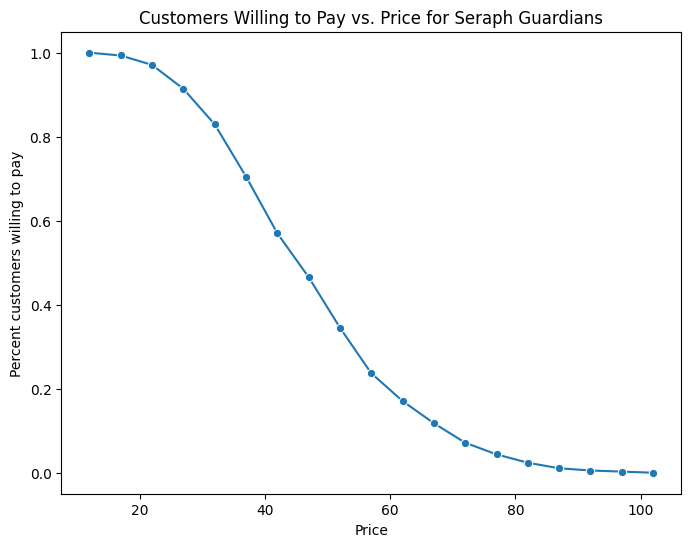

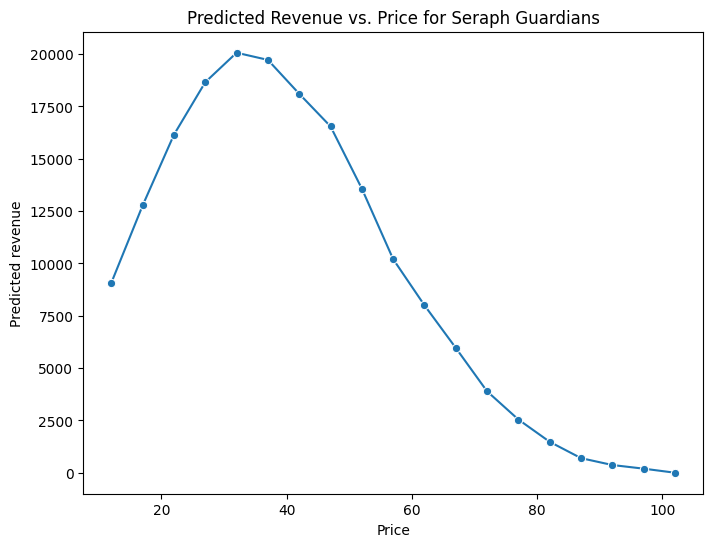

WTP Analysis for Evercrest:


<ipython-input-53-cb91a14f4b95>:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cumulative_wtp = pd.concat([cumulative_wtp, pd.DataFrame({


,price,per_customers_wtp,pred_revenue
0,14.0,1.000000,9492.0
1,19.0,0.988201,12730.0
2,24.0,0.939528,15288.0
3,29.0,0.862832,16965.0
4,34.0,0.758112,17476.0
5,39.0,0.638643,16887.0
6,44.0,0.507375,15136.0
7,49.0,0.396755,13181.0
8,54.0,0.294985,10800.0
9,59.0,0.202065,8083.0


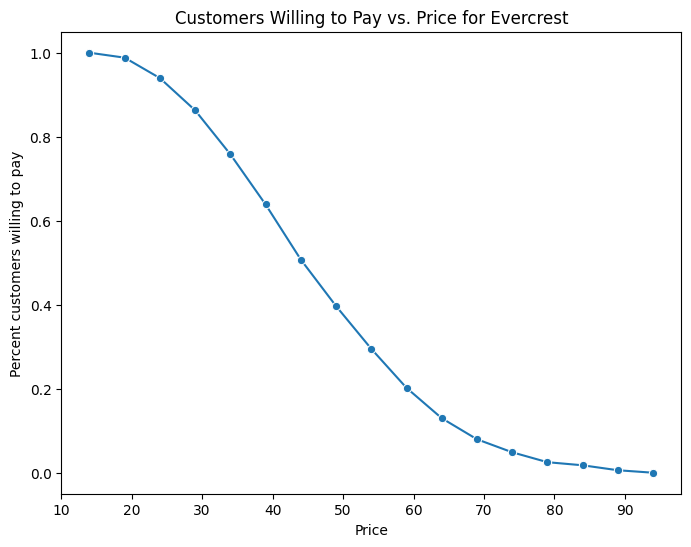

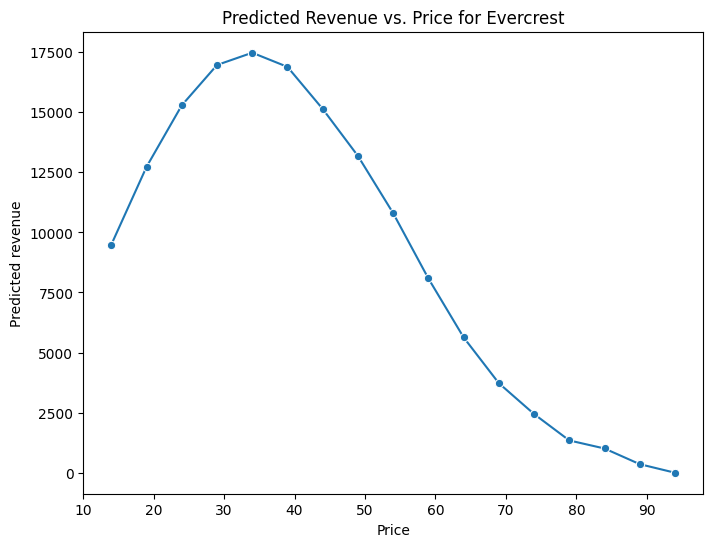

In [ ]:
for game in Athena_filled['gg.game.presented'].unique():
    cumulative_wtp = pd.DataFrame(columns=['price', 'per_customers_wtp', 'pred_revenue'])

    # Filter data for the current game
    game_data = Athena_filled[Athena_filled['gg.game.presented'] == game]

    for price in np.arange(min(game_data['gg.maxprice']), max(game_data['gg.maxprice']) + 5, 5):
        num_respondents_wtp = sum(game_data['gg.maxprice'] >= price)
        cumulative_wtp = pd.concat([cumulative_wtp, pd.DataFrame({
            'price': [price],
            'per_customers_wtp': [num_respondents_wtp / len(game_data)],
            'pred_revenue': [num_respondents_wtp * price]
        })], ignore_index=True)

    print(f"WTP Analysis for {game}:")
    display(cumulative_wtp)

    # Plotting WTP for the current game
    plt.figure(figsize=(8, 6))
    sns.lineplot(x='price', y='per_customers_wtp', data=cumulative_wtp, marker='o')
    plt.xlabel('Price')
    plt.ylabel('Percent customers willing to pay')
    plt.title(f'Customers Willing to Pay vs. Price for {game}')
    plt.show()

    # Plot revenue for the current game
    plt.figure(figsize=(8, 6))
    sns.lineplot(x='price', y='pred_revenue', data=cumulative_wtp, marker='o')
    plt.xlabel('Price')
    plt.ylabel('Predicted revenue')
    plt.title(f'Predicted Revenue vs. Price for {game}')
    plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression


for game in Athena_filled['gg.game.presented'].unique():
    # Filter data for the current game
    game_data = Athena_filled[Athena_filled['gg.game.presented'] == game]

    # Create dummy variables for segments
    segment_dummies = pd.get_dummies(game_data['Segment_Label'], prefix='Segment')
    gender_dummies = pd.get_dummies(game_data['gender'], prefix='Gender')
    game_data = pd.concat([game_data, segment_dummies, gender_dummies], axis=1)

    # Prepare data for regression
    X = game_data[['age', 'income'] + list(segment_dummies.columns) + list(gender_dummies.columns)]  # Features
    y = game_data['gg.maxprice']  # Target variable

    # Fit linear regression model
    regressor = LinearRegression()
    regressor.fit(X, y)

    # Get coefficients for each segment
    segment_coefficients = {column: coefficient for column, coefficient in zip(X.columns, regressor.coef_)}

    # Find segment with highest coefficient (most interested)
    most_interested_segment = max(segment_coefficients, key=segment_coefficients.get)
    least_interested_segment = min(segment_coefficients, key=segment_coefficients.get)


    print(f"\nGame: {game}")
    print(f"Most interested segment (predicted): {most_interested_segment.replace('Segment_', '')}")
    print(f"Least interested segment (predicted): {least_interested_segment.replace('Segment_', '')}")


Game: Warrior Guild
Most interested segment (predicted): Curious Free-Spirits
Least interested segment (predicted): Structured Traditionalists

Game: Seraph Guardians
Most interested segment (predicted): Curious Adventurers
Least interested segment (predicted): Casual Comfort Gamers

Game: Evercrest
Most interested segment (predicted): Thoughtful Explorers
Least interested segment (predicted): Structured Traditionalists


In [ ]:
development_costs = {
    'Evercrest': 6000000,
    'Seraph Guardians': 5500000,
    'Warrior Guild': 5000000
}

for game in Athena_filled['gg.game.presented'].unique():
    cumulative_wtp = pd.DataFrame(columns=['price', 'per_customers_wtp', 'pred_revenue'])

    # Filter data for the current game
    game_data = Athena_filled[Athena_filled['gg.game.presented'] == game]

    for price in np.arange(min(game_data['gg.maxprice']), max(game_data['gg.maxprice']) + 5, 5):
        num_respondents_wtp = sum(game_data['gg.maxprice'] >= price)
        cumulative_wtp = pd.concat([cumulative_wtp, pd.DataFrame({
            'price': [price],
            'per_customers_wtp': [num_respondents_wtp / len(game_data)],
            'pred_revenue': [num_respondents_wtp * price]
        })], ignore_index=True)

    # Adjust 'per_customers_wtp' for 30% purchase probability
    cumulative_wtp['per_customers_wtp'] = cumulative_wtp['per_customers_wtp'] * 0.30

    # Scale predicted revenue to 10 million customers
    cumulative_wtp['pred_revenue'] = cumulative_wtp['per_customers_wtp'] * 10000000 * cumulative_wtp['price']

    # Gross Revenue: Maximum predicted revenue
    gross_revenue = cumulative_wtp['pred_revenue'].max()

    # Calculate tiered distribution fee
    if gross_revenue <= 10000000:
        distribution_fee = gross_revenue * 0.30
    elif gross_revenue <= 50000000:
        distribution_fee = (10000000 * 0.30) + ((gross_revenue - 10000000) * 0.25)
    else:
        distribution_fee = (10000000 * 0.30) + (40000000 * 0.25) + ((gross_revenue - 50000000) * 0.20)

    # Royalty costs (5% of gross revenue)
    royalty_cost = gross_revenue * 0.05

    # Total costs (fixed costs + development costs + royalty costs)
    total_costs = 7000000 + development_costs[game] + royalty_cost + distribution_fee

    # Net profit (net revenue - total costs)
    net_revenue = gross_revenue - total_costs

    print(f"\nGame: {game}")
    print(f"Gross Revenue (First Year): ${gross_revenue:,.2f}")
    print(f"Total Costs: ${total_costs:,.2f}")
    print(f"Net Revenue (First Year): ${net_revenue:,.2f}")







Game: Warrior Guild
Gross Revenue (First Year): $80,709,677.42
Total Costs: $35,177,419.35
Net Revenue (First Year): $45,532,258.06

Game: Seraph Guardians
Gross Revenue (First Year): $79,619,047.62
Total Costs: $35,404,761.90
Net Revenue (First Year): $44,214,285.71

Game: Evercrest
Gross Revenue (First Year): $77,327,433.63
Total Costs: $35,331,858.41
Net Revenue (First Year): $41,995,575.22


<ipython-input-64-045def8cc15c>:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cumulative_wtp = pd.concat([cumulative_wtp, pd.DataFrame({
<ipython-input-64-045def8cc15c>:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cumulative_wtp = pd.concat([cumulative_wtp, pd.DataFrame({
<ipython-input-64-045def8cc15c>:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when deter

In [ ]:
rank_columns = ['rank.WarriorGuild', 'rank.SeraphGuardians', 'rank.Evercrest', 'rank.DevilsGate', 'rank.Marksman', 'rank.QuestoftheTitan']

# Replace game names with actual names
game_names = {
    'rank.WarriorGuild': 'Warrior Guild',
    'rank.SeraphGuardians': 'Seraph Guardians',
    'rank.Evercrest': 'Evercrest',
    'rank.DevilsGate': 'Devils Gate',
    'rank.Marksman': 'Marksman',
    'rank.QuestoftheTitan': 'Quest of the Titan'
}

for acquired_game in ['rank.Evercrest', 'rank.SeraphGuardians', 'rank.WarriorGuild']:
    # Get the actual game name for acquired_game
    acquired_game_name = game_names[acquired_game]

    # Columns to consider for this scenario
    relevant_columns = [acquired_game, 'rank.DevilsGate', 'rank.Marksman', 'rank.QuestoftheTitan']
    relevant_columns_names = [game_names.get(col, col) for col in relevant_columns]  # Map to actual names

    # Find the highest ranked game among the relevant columns
    Athena['first_choice_scenario'] = Athena[relevant_columns].idxmin(axis=1)
    Athena['first_choice_scenario'] = Athena['first_choice_scenario'].map(game_names)  # Map to game names

    # Calculate Market Share for this scenario
    market_share_scenario = Athena['first_choice_scenario'].value_counts(normalize=True) * 100

    # Athena's Market Share for this acquisition
    athena_market_share = market_share_scenario[market_share_scenario.index == acquired_game_name].values[0]

    print(f"\nScenario: Athena acquires {acquired_game_name}")
    print("Athena's Market Share:")
    print(f"{athena_market_share:.2f}%")


Scenario: Athena acquires Evercrest
Athena's Market Share:
17.49%

Scenario: Athena acquires Seraph Guardians
Athena's Market Share:
57.76%

Scenario: Athena acquires Warrior Guild
Athena's Market Share:
23.78%
